In [ ]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
from eofs.xarray import Eof

In [ ]:
#import dask to parallelise
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38415 instead
  warnings.warn(


In [ ]:
mask = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/sst_restore_mask_25N_25S_5deg_damping_trop_pacific.nc", decode_times = False)

In [ ]:
mask = mask.restore_mask

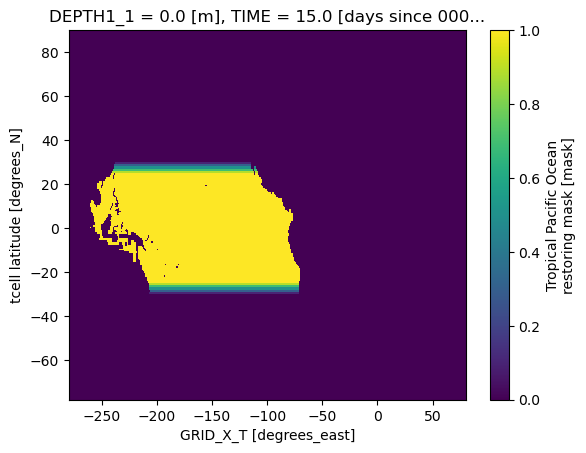

In [ ]:
mask[0,0].plot()

In [ ]:
had_rest = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Had_ENSO/CP_elnino_year0.nc", decode_times = False)

In [ ]:
mod_rest = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Mod_ENSO/CP_elnino_year0.nc", decode_times = False)

In [ ]:
model_clim = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/global_sst_restoring_cm000_climatology_0951-1150.nc", decode_cf=False)

In [ ]:
had_clim = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/HadISST_Climatology.nc", decode_cf=False)

In [ ]:
had_clim = had_clim.temp

In [ ]:
model_clim = model_clim.temp

In [ ]:
ctrl = xr.open_dataset("/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/ocn/ocean_month.nc-09501231",
                         use_cftime=True)

In [ ]:
dht = ctrl.dht[:,0]

In [ ]:
lsm = xr.where(dht>0, 1, np.nan)

In [ ]:
lsm = lsm.rename({"st_ocean":"DEPTH1_1", "yt_ocean":"GRID_Y_T", "xt_ocean":"GRID_X_T", "time": "TIME"})

In [ ]:
lsm = lsm.assign_coords({"TIME": mask.TIME})

In [ ]:
lsm = lsm.drop({"DEPTH1_1", "geolat_t", "geolon_t"})

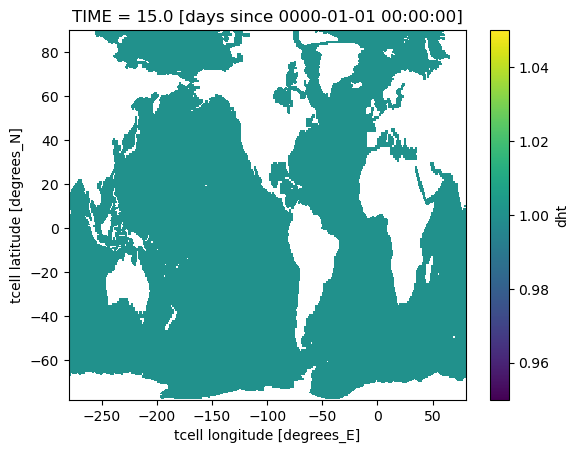

In [ ]:
(lsm[0]).plot(alpha = 1)

In [ ]:
had_rest = had_rest.temp

In [ ]:
mod_rest = mod_rest.temp

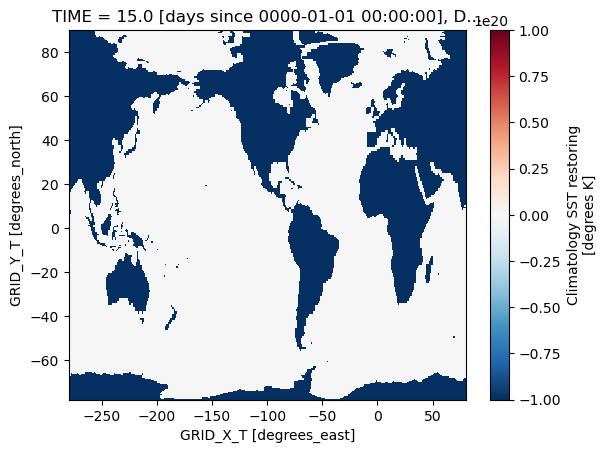

In [ ]:
had_rest.where(had_rest >-9999, -1e20)[0,0].plot()

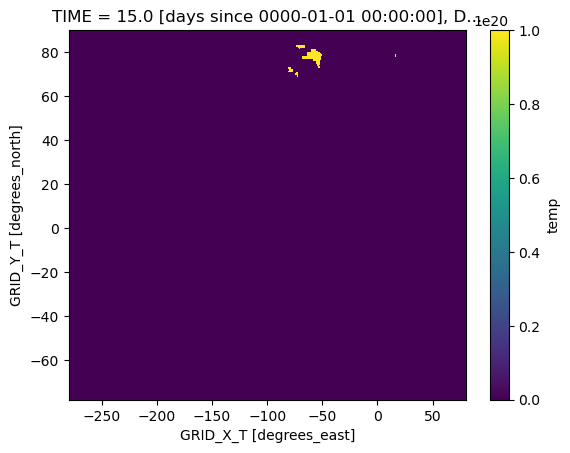

In [ ]:
(mod_rest.where(mod_rest >-9999, -1e20)[0,0] - had_rest.where(had_rest >-9999, -1e20)[0,0]).plot()

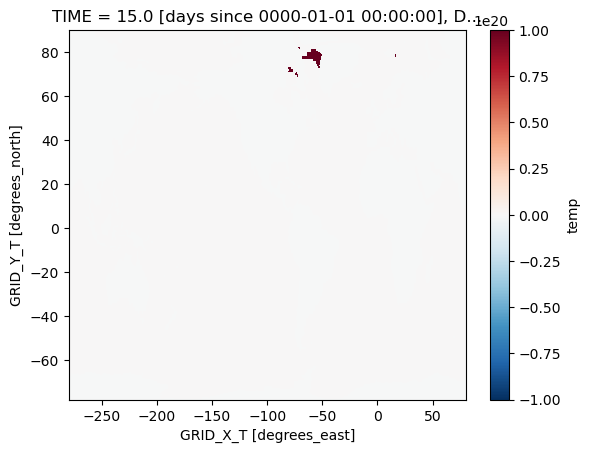

In [ ]:
(model_clim.where(model_clim >-9999, -1e20)[0,0] - had_clim.where(had_clim >-9999, -1e20)[0,0]).plot()

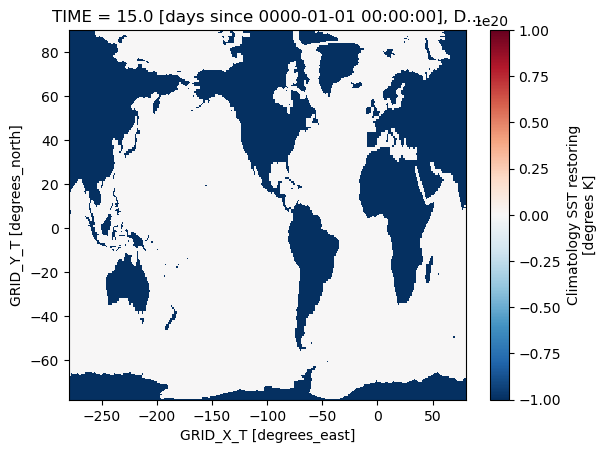

In [ ]:
model_clim[0,0].plot()